In [1]:
%matplotlib inline

In [2]:
import tifffile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision_multi import transform_multi
from torchvision_multi.datasets import image_loader
from skimage import io
import cv2

this module is design for multi-channel image tranform of pytorch. for now all the input image should be numpy.ndarray.

there are three way to use this module.

1. independence use: you can use the function or class independently.
2. input transform: purpose for image classification
    - single label classification
    - multi label classification
3. input and target transform simultaneously: purpose for image semantic segmentation and instance segmentation


## 1. Independence Use
you can use this module independence 

In [3]:
# loading data and show the original image
img_tif = tifffile.imread('./sample-data/7-channel.tif')
# img_jpg = Image.open('./sample-data/2007_000129.png')
# img_jpg=np.array(img_jpg)
# img_jpg.shape
img_jpg = cv2.imread('./sample-data/2007_000129.jpg')
img_jpg.shape[0]
# img_tif = img_tif.astype(np.float, copy=False) # covert the original image float32 to uint32

500

(200, 300, 7)


(<matplotlib.figure.Figure at 0x7fb8ef420e80>,
 <matplotlib.image.AxesImage at 0x7fb8ef2f26a0>)

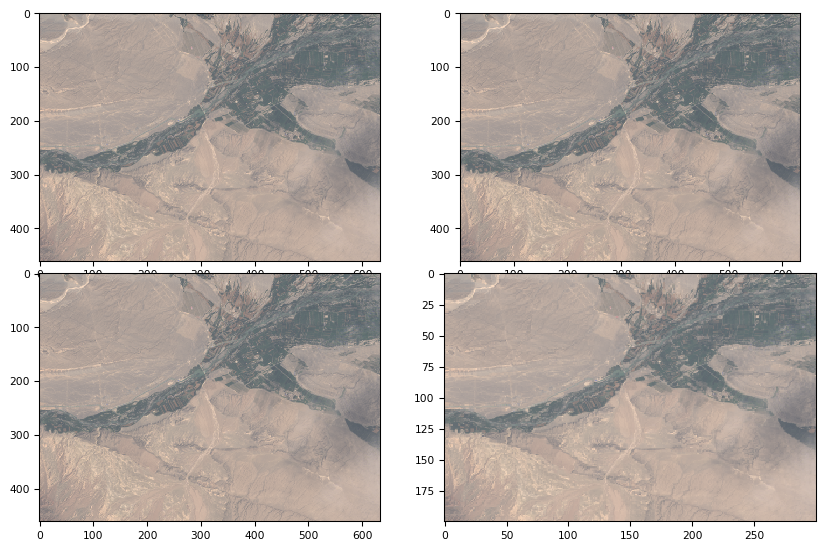

In [4]:
# img_tif_addnoise = transform_multi.noise(img_jpg,8,0,0.001)
# img_jpg_addnoise = transform_multi.noise(img_jpg,8)
# img_jpg_pad = transform_multi.pad(img_jpg,[(30,30),(30,30),(0,0)],'reflect')
# img_tif_pad = transform_multi.pad(img_tif,[(30,30),(30,30),(0,0)],'reflect')
# img_tif_cencrop = transform_multi.centercrop(img_jpg,(300,300),target=True)
img_tif_resize = transform_multi.resize(img_tif,(300,200))
# img_tif_gaussianblur = transform_multi.gaussianblur(img_tif,sigma=2)
# img_tif_piecewise = transform_multi.piecetransform(img_tif,numcols=5, numrows=5, warp_left_right=50, warp_up_down=50)
print(img_tif_resize.shape)

fig=plt.figure()
tifffile.imshow(img_tif[:,:,[3,2,1]], subplot=221)  #original
tifffile.imshow(img_tif[:,:,[3,2,1]], figure=fig,subplot=222)
tifffile.imshow(img_tif[:,:,[3,2,1]], figure=fig,subplot=223)

tifffile.imshow(img_tif_resize[:,:,[3,2,1]], figure=fig, subplot=224) 
# tifffile.imshow(img_tif_crop[:,:,[3,2,1]], figure=fig, subplot=222)
# tifffile.imshow(img_jpg_pad[:,:,[0,1,2]], figure=fig)
# tifffile.imshow(img_tif_pad[:,:,[3,2,1]], figure=fig)
# tifffile.imshow(img_tif_addnoise[:,:,[3,2,1]], figure=fig, subplot=222)
# tifffile.imshow(img_tif_rotate[:,:,[3,2,1]], figure=fig, subplot=223) 
# tifffile.imshow(img_tif_shift[:,:,[3,2,1]], figure=fig, subplot=224)
# tifffile.imshow(img_tif_crop[:,:,[3,2,1]], figure=fig, subplot=224)
# tifffile.imshow(img_tif_gaussianblur[:,:,[3,2,1]], figure=fig, subplot=224)
# tifffile.imshow(img_tif_piecewise[:,:,[3,2,1]], figure=fig, subplot=224)

## 2. input transform
purpose for image classification
 - single label classification
 - multi label classification

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader

<class 'numpy.ndarray'> 30000
<class 'numpy.ndarray'> 30000
<class 'numpy.ndarray'> 30000
<class 'numpy.ndarray'> 30000


<class 'numpy.ndarray'> 30000
<class 'numpy.ndarray'> 30000
<class 'numpy.ndarray'> 30000
<class 'numpy.ndarray'> 30000


<class 'numpy.ndarray'> 30000
<class 'numpy.ndarray'> 30000
<class 'numpy.ndarray'> 30000
<class 'numpy.ndarray'> 30000




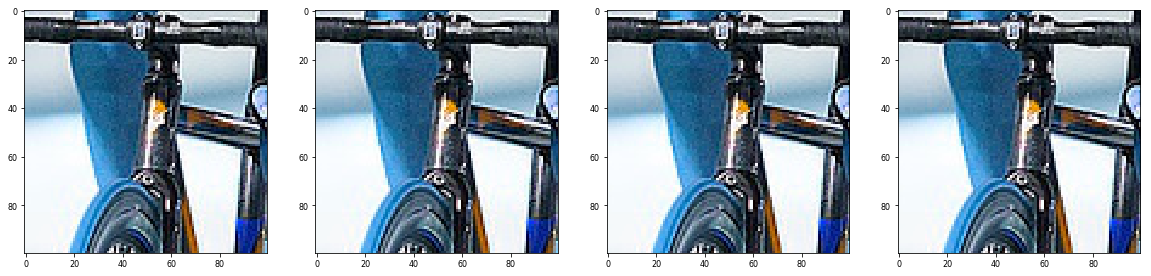

In [47]:
fig = plt.figure(figsize=(20,6))

batch_size=4
transform = transform_multi.Compose([
#     transform_multi.RandomRotate(0.5),
#       transform_multi.RandomNoise(1,8,0,0.00001),
#     transform_multi.RandomShift(0.5, 30, 30),
#     transform_multi.RandomCrop((300,300)),
#     transform_multi.Pad([(30,30),(30,30),(0,0)],'reflect'),
    transform_multi.CenterCrop([100,100]),
#       transform_multi.Resize((200,200)),
#     transform_multi.PieceTransfor(0.5,5,5,50,50),
    transform_multi.Lambda(lambda x: transform_multi.to_tensor(x))
])

# trainset = image_loader.SingleLabelImageLoader(
#     root='./sample-data/', lstpath='./sample-data/parse_single_lstfile_tiff.lst',
#     filetype='tif', transform=transform,
#     )
trainset = image_loader.SingleLabelImageLoader(
    root='./sample-data/', lstpath='./sample-data/parse_single_lstfile.lst',
    filetype='jpg', transform=transform,
    )

trainloader = DataLoader(dataset=trainset,batch_size=batch_size,shuffle=False)

for step, (inputs, targets) in enumerate(trainloader):
#     print('batch: {} ........'.format(idx))
#     print(type(images), images.shape)
#     print(type(targets), targets.shape)
    
    # Variable, cuda
    # net feed forward
    # loss
    # back propagation
     
    #plot
    for idx, item in enumerate(inputs):
        item = torch.squeeze(item,0)
        img_ndarr = transform_multi.to_ndarray(item)
        subplot = int(''.join(str(x) for x in [1, batch_size, idx+1]))
        print(type(img_ndarr), img_ndarr.size)
#         tifffile.imshow(img_ndarr[:,:,[3,2,1]], figure=fig, subplot=subplot)  
        tifffile.imshow(img_ndarr[:,:,[2,1,0]], figure=fig, subplot=subplot)
    plt.savefig('./sample-data/plot/{}.png'.format(step), bbox_inches='tight')
    print('\n')


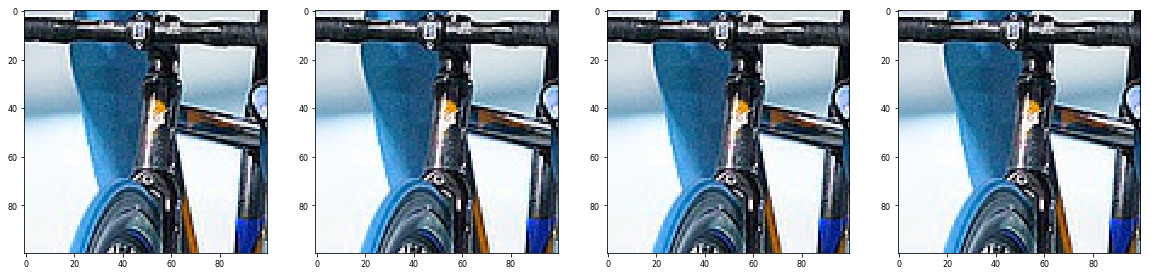

In [48]:
from IPython.display import Image
Image("sample-data/plot/0.png")

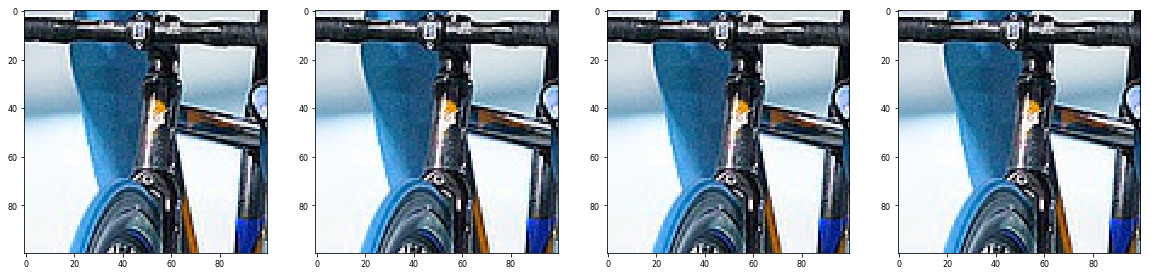

In [49]:
Image("sample-data/plot/1.png")

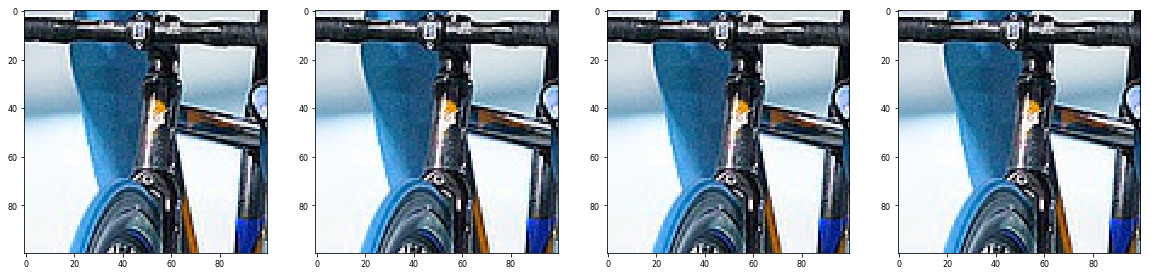

In [50]:
Image("sample-data/plot/2.png")

---

## 3. input and target transform simultaneously

purpose for image semantic segmentation and instance segmentation